# Extracted WLCs

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import glob as glob
import matplotlib as mpl
import matplotlib.patheffects as PathEffects
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import numpy as np
import pandas as pd
import seaborn as sns

import bz2
import corner
import json
import pathlib
import pickle
import utils
import warnings

from astropy import constants as const
from astropy import units as uni
from astropy.io import ascii, fits
from astropy.time import Time
from mpl_toolkits.axes_grid1 import ImageGrid

# Default figure dimensions
FIG_WIDE = (11, 5)
FIG_LARGE = (8, 11)

# Figure style
sns.set(style="ticks", palette="colorblind", color_codes=True, context="talk")
params = utils.plot_params()
plt.rcParams.update(params)

## [Dowload data](https://www.dropbox.com/sh/f6rqfis0rdd0w1r/AAADJF0JI-YEx1cS9oCiwKP6a?dl=1) (same dataset used for extracted spectra)

Unzip this into a folder named `data` in the same level as this notebook

## Finish set-up

In [ ]:
! ln -srf data/extracted_spectra data/extracted_wlcs

## Load

In [3]:
# Load
base_dir = "data/extracted_wlcs"

data_dict = {
#     "Transit 1": {
#         "data": utils.load_pickle(
#             f"{base_dir}/ut131219_a15_25_noflat/LCs_w50_bins.pkl"
#         ),
#         "comps_to_highlight": ["c15", "c18", "c21", "c23"],
#         #"bad_idxs_user": "[81, 114, 145, 146, 153, 154, 172, 175, 184, 201]",
#         #"bad_idxs_user": "[81, 114, 145, 146, 153, 154, 158:172, 175, 184, 201]", # missing shoulder test
#         "bad_idxs_user": "[81, 114, 146, 201]", # less aggressive
#         "t0": Time("2013-12-19 03:22").jd,
#     },
    "Transit 1 (px)": {
        "data": utils.load_pickle(
            f"{base_dir}/ut131219_a15_25_noflat_fixbadpixels/LCs_w50_bins.pkl"
        ),
        "comps_to_highlight": ["c15", "c18", "c21", "c23"],
        "bad_idxs_user": "[81, 114, 146, 172, 175, 184, 201]",
        "t0": Time("2013-12-19 03:22").jd,
    },
#     "Transit 2": {
#         "data": utils.load_pickle(
#             f"{base_dir}/ut150927_a15_25_noflat/LCs_w50_bins.pkl"
#         ),
#         "comps_to_highlight": ["c15", "c18", "c21", "c23"],
#         "bad_idxs_user": "[7, 8, 11, 31, 33, 112, 136, 153, 240]",
#         "t0": Time("2015-09-27 06:37").jd,
#     },
    "Transit 2 (px)": {
        "data": utils.load_pickle(
            f"{base_dir}/ut150927_a15_25_noflat_fixbadpixels/LCs_w50_bins.pkl"
        ),
        "comps_to_highlight": ["c15", "c18", "c21", "c23"],
        "bad_idxs_user": "[7, 8, 11, 31, 33, 240]",
        "t0": Time("2015-09-27 06:37").jd,
    },
#     "Transit 3": {
#         "data": utils.load_pickle(
#             f"{base_dir}/ut161211_a24_42_noflat/LCs_w50_bins.pkl"
#         ),
#         "comps_to_highlight": ["c06", "c13"],
#         "bad_idxs_user": "[18, 40, 41, 42, 43, 44, 45, 88, 180:182]",
#         #"bad_idxs_user": "[18, 40, 41, 42, 43, 44, 45, 52, 55, 88, 200:223]", # missing shoulder test
#         "t0": Time("2016-12-12 03:03").jd,
#     },
    "Transit 3 (px)": {
        "data": utils.load_pickle(
            f"{base_dir}/ut161211_a24_42_noflat_fixbadpixels/LCs_w50_bins.pkl"
        ),
        "comps_to_highlight": ["c06", "c13"],
        "bad_idxs_user": "[18, 40, 41, 42, 43, 44, 45, 52, 55, 88]",
        "t0": Time("2016-12-12 03:03").jd,
    },
}

## Plot

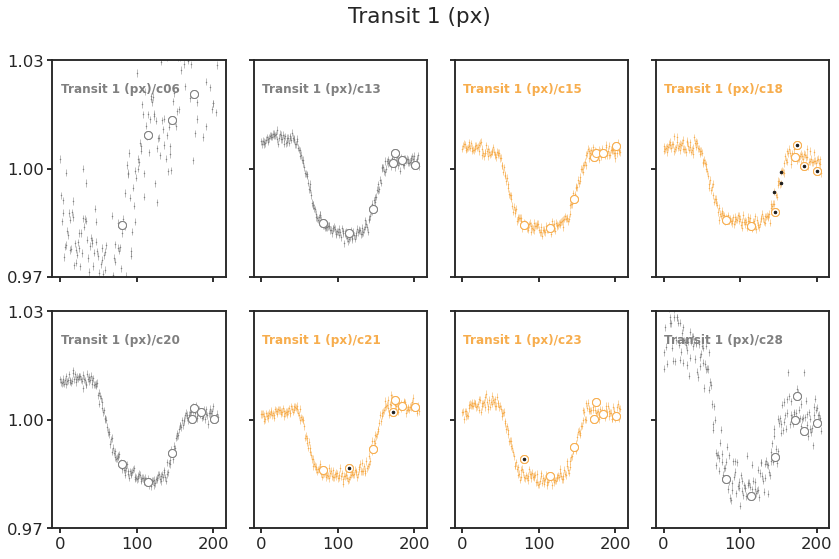

Transit 1 (px)
[81, 114, 145, 146, 153, 154, 172, 175, 184, 201]




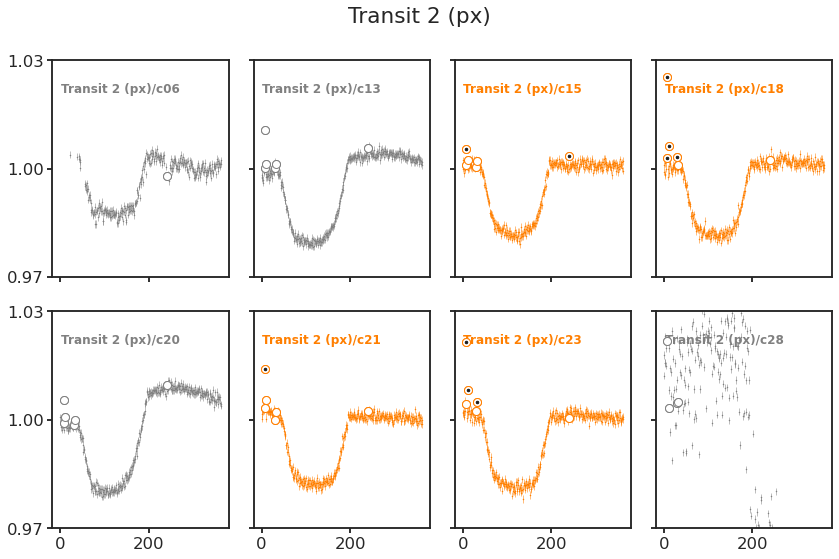

Transit 2 (px)
[7, 8, 11, 31, 33, 240]




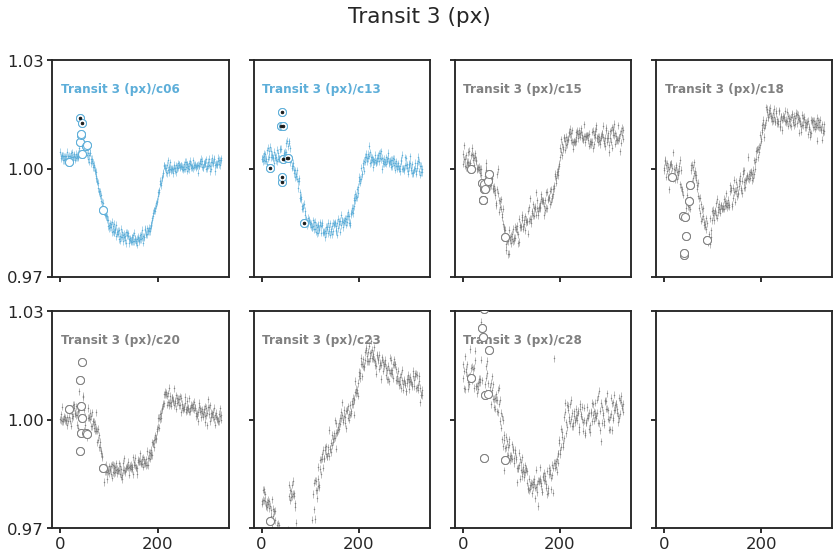

Transit 3 (px)
[18, 40, 41, 42, 43, 44, 45, 52, 55, 88]




In [4]:
colors = sns.color_palette()
for i, (transit_name, transit_info) in enumerate(data_dict.items()):
    data = transit_info["data"]
    t0 = transit_info["t0"]
    comps = data["cNames"]
    comps_to_highlight = transit_info["comps_to_highlight"]
    bad_idxs_user = transit_info["bad_idxs_user"]
    ncomps = len(comps)
    nrows = 2
    ncols = 4 #int(ncomps / nrows)
    
    fig, axes = plt.subplots(
        nrows, ncols, 
        sharex =True, sharey=True,
        figsize = (12, 8),
    )
    
    #print(transit_name)
    bad_idxs_dict = {}
    for ax, comp in zip(axes.flat, comps): 
        p, bad_idxs_dict[comp] = utils.plot_divided_wlcs(
            ax,
            data,
            t0 = 0,#t0,
            ferr = 0.001,
            comps_to_use = [comp],
            div_kwargs = {"fmt": ".", "lw": 0.5, "mew": 0.0, "ms": 3, "c": colors[i]},
            bad_div_kwargs = {"marker": "o", "lw": 0, "mew": 1, "mec": colors[i], "ms": 8, "c": "w"},
            bad_idxs_user = bad_idxs_user,
            comps_to_highlight = comps_to_highlight,
            use_time=False,
        )
        #print(comp)
        #print(bad_idxs)

        if comp not in comps_to_highlight:
            ann_c = "grey"
        else:
            ann_c = colors[i]
        ax.annotate(
            rf"{transit_name}/{comp}",
            xy = (0.05, 0.85),
            xycoords = "axes fraction",
            fontsize = 12,
            color = ann_c,
            weight = "bold",
        )

        #ax.set_xlim(-2.5, 2.5)
        ax.set_ylim(0.97, 1.02)
        ax.yaxis.set_ticks([0.97, 1.00, 1.03])
        
        fig.suptitle(transit_name)
        fig.tight_layout()
        
    plt.show()
    
    # Print set of bad_idxs from highlighted comps
    print(transit_name)
    d = {k:bad_idxs_dict[k] for k in comps_to_highlight}
    print(sorted(list(set().union(*d.values()))))
    print()
    print()

#fig.text(0.54, -0.02, "Time from estimated mid-transit (hours)", ha="center")
#fig.text(-0.01, 0.5, "Normalizd flux", va="center", rotation="vertical")
#fig.set_size_inches(FIG_LARGE)

#utils.savefig("../paper/figures/extracted_wlcs/all_transits_extr_wlcs.pdf")

In [ ]:
# data = utils.load_pickle("data/extracted_wlcs/ut150927_a15_25_noflat/LCs_w50_bins.pkl")

# data_radec = utils.load_pickle("data/extracted_spectra/ra_dec/ut150927_a15_25_noflat/LCs_w50_bins.pkl")

# np.all(data["t"] == data_radec["t"])

## LDSS3

In [5]:
cube = np.load(
    "/home/mango/data/WASP50/LDSS3/spectralCube_WASP-50b_LDSS3_e150927_4stars_316spectra_05px_shifted.npy",
    allow_pickle=True,
)[()]

In [6]:
target = cube["target"]
target

'aperture_324_803'

In [7]:
comps = cube["comparisons"]
comps

array(['aperture_28_1189', 'aperture_153_1117', 'aperture_830_689'],
      dtype='<U17')

In [97]:
wave = cube["spectral"]["wavelength"]
wave

array([5000, 5001, 5002, ..., 9797, 9798, 9799])

In [9]:
raw_counts = cube["cubes"]["raw_counts"]
raw_counts[target].shape

(316, 4800)

In [10]:
flux_targ = np.sum(raw_counts[target], axis=1)

In [11]:
flux_comps = np.c_[
    [np.sum(raw_counts[comp], axis=1) for comp in comps]
]

fs = flux_targ / flux_comps

Text(0, 0.5, 'Normalized flux')

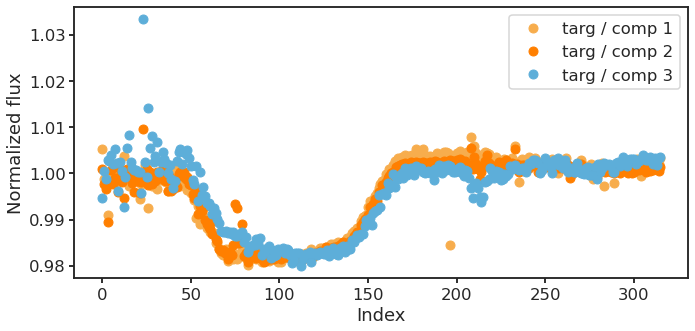

In [12]:
fig, ax = plt.subplots(figsize=FIG_WIDE)

for i, f in enumerate(fs, start=1):
    ax.plot(
        f / np.median(f), 'o',
        label=f"targ / comp {i}",
    )
    
ax.legend()
ax.set_xlabel("Index")
ax.set_ylabel("Normalized flux")

#utils.savefig("/home/mango/Desktop/div_wlcs.png", dpi=250)

In [13]:
def get_wav_idxs(wavs, wmin, wmax):
    return slice(np.where(wave==wmin)[0][0], np.where(wave==wmax)[0][0]+1)

In [115]:
wav_low = 5_800
wav_hi = 9_400
dwav = 200

wav_range_idxs = []
for wav_lower in np.arange(wav_low, wav_hi + dwav, dwav):
    wav_range_idxs.append(get_wav_idxs(wave, wav_lower, wav_lower + dwav))
    
wbins = np.array([
    [wave[wav_range_idx.start], wave[wav_range_idx.stop - 1]]
    for wav_range_idx in wav_range_idxs
])

oLCw = [
    np.sum(raw_counts[target][:, wav_range_idx], axis=1)
    for wav_range_idx in wav_range_idxs
]
oLCw = np.array(oLCw)

ncomps = len(comps)
ntime = len(raw_counts[target])
nbins = len(wav_range_idxs)
cLCw = np.empty((ncomps, nbins, ntime)) # comp star x wavelength bins x time
for c_i, comp in enumerate(comps):
    cLCw[c_i, :, :] = [
        np.sum(raw_counts[comp][:, wav_range_idx], axis=1)
        for wav_range_idx in wav_range_idxs
    ]
    
fluxes = np.transpose(oLCw / cLCw[0, :, :])
fluxes = fluxes / np.median(fluxes, axis=0)

### Plot

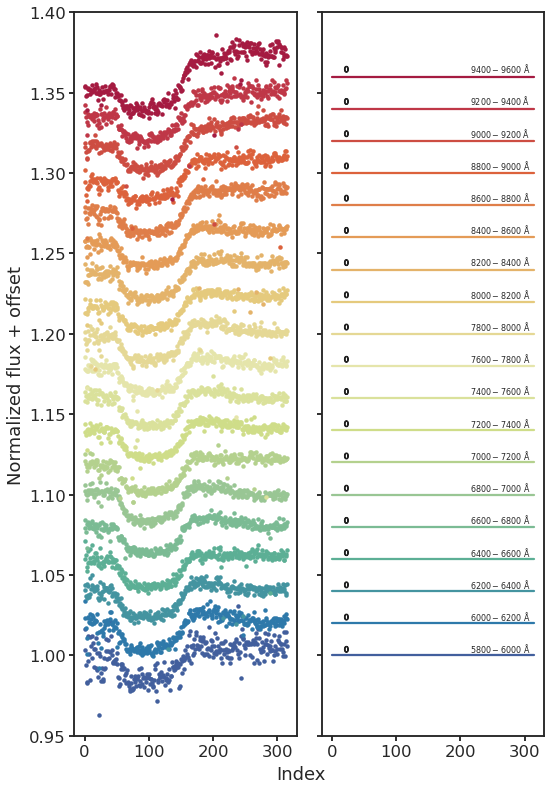

In [154]:
fig, axes = plt.subplots(1, 2, figsize=(8, 11), sharex=True, sharey=True)
ax_left, ax_right = axes

offs = 0.02

utils.plot_binned(
    ax_left,
    range(ntime),
    fluxes,
    wbins,
    offs,
    np.array(sns.color_palette("Spectral_r", nbins)),
    plot_kwargs={"marker":'.', "mew":0, "lw":0},
)

utils.plot_binned(
    ax_right,
    range(ntime),
    np.ones_like(fluxes),
    utc=False,
    bins=wbins, 
    offset=offs,
    colors=np.array(sns.color_palette("Spectral_r", nbins)),
    annotate=True,
    annotate_kwargs={"fontsize":8, "ha":"center"},
    annotate_rms_kwargs = {
        "fontsize":8, 
        "path_effects":[PathEffects.withStroke(linewidth=1, foreground="k")],
    }
)

ax_left.set_ylim(0.95, 1.4)
ax_left.set_ylabel("Normalized flux + offset")
fig.text(0.5, 0, 'Index', ha='left')

fig.tight_layout()

utils.savefig("/home/mango/Desktop/reduced_blcs.png", dpi=250)

<ipython-input-38-bcf42d45a4b3>:4: RuntimeWarning: invalid value encountered in true_divide
  f = oLCw_n / cLCw_n
<ipython-input-38-bcf42d45a4b3>:4: RuntimeWarning: invalid value encountered in true_divide
  f = oLCw_n / cLCw_n


(0.98, 1.3)

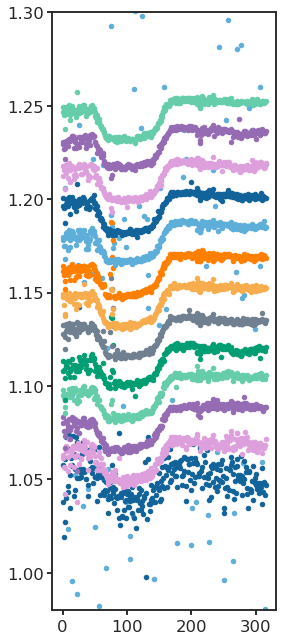

In [38]:
fig, ax = plt.subplots(figsize=(4, 11))

for offs, (oLCw_n, cLCw_n) in enumerate(zip(oLCw, cLCw[1, :, :])):
    f = oLCw_n / cLCw_n
    ax.plot(f / np.median(f) + offs/60, '.')
    
ax.set_ylim(0.98, 1.3)